In [22]:
%matplotlib inline


# Ejercicio de Manifold Learning: Proyecto Aceite de Oliva

### Aprendizaje máquina II (Curso 2023-2024)


### Nombre y apellidos: 

## 1.- Carga de datos.

Carga el conjunto de datos **olive.csv**. Este conjunto de datos clasifica diferentes tipos de aceites de oliva italianos en regiones (3 grupos) y áreas (9 grupos) en función de su composición. Separa el conjunto de datos en *X*, *y3* y *y9*.

In [23]:
import umap
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.subplots as tls
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from pandas import read_csv 
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D


In [24]:
path_olives = './data/olive.csv'
dataframe = pd.read_csv(path_olives)
dataframe.head(7)

,class,Region,Area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,952,49,254,7795,780,50,75,41
1,North-Apulia,1,1,1036,59,235,7868,661,30,62,44
2,North-Apulia,1,1,1075,75,226,7823,672,36,60,29
3,North-Apulia,1,1,995,46,288,7806,679,56,86,40
4,North-Apulia,1,1,1155,98,201,7606,816,32,60,29
5,North-Apulia,1,1,922,66,264,7990,618,49,56,29
6,Calabria,1,2,1296,136,260,7380,780,48,51,18


In [25]:
'''
Dividimos los datos en tres grupos. Uno con las propiedades de los
aceites, otro con la región de procedencia y otro con el área de
procedencia.
'''

X   = dataframe.drop(['class', 'Region', 'Area'], axis = 1)
y3  = dataframe['Region']
y3_categories =[str(i) for i in y3]
y9  = dataframe['Area']
y9_categories =[str(i) for i in y9]

In [26]:
print("Dimensiones de X: ", X.shape)
print("Dimensiones de y3:", y3.shape)
print("Dimensiones de y9:", y9.shape)

Dimensiones de X:  (572, 8)
Dimensiones de y3: (572,)
Dimensiones de y9: (572,)


## 2.- Visualización de los datos.

- Utilizando los algoritmos t-SNE y UMAP vistos en clase, realiza una visualización de los datos en 2D y en 3D (utiliza la librería plotly para la representación 3D) coloreando los puntos con `labels3` y `labels9`. En UMAP, utiliza la versión no supervisada.
- Varía los parámetros de perplexity y n_neighbors según consideres y comenta qué valores has escogido y porqué.
- Comenta los gráficos y compara los resultados en función del valor de KL obtenido (en t-SNE). 


### 2.1 Visualización 2D y 3D de los datos con t-SNE y UMAP

In [27]:
# si n_jobs= 1 se desactiva el paralelismo
# si n_jobs=-1 se activa el paralelismo
# activar el paralelismo rompe el determinismo de random state de UMAP
umap_instance = umap.UMAP(n_jobs= 1)
# umap_instance = umap.UMAP(n_jobs=-1)

#TSNE
tsne_2d  = TSNE(n_components=2,     # 2D embedding
                random_state=42, 
                perplexity=30,    
                metric="euclidean",
                verbose=True       # no output
                )      

X_tsne_2d = tsne_2d.fit_transform(X)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 572 samples in 0.001s...
[t-SNE] Computed neighbors for 572 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 572 / 572
[t-SNE] Mean sigma: 62.042635
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.264114
[t-SNE] KL divergence after 1000 iterations: 0.311541


In [28]:

#UMAP
umap_2d = umap.UMAP(n_components=2,  # 2D embedding
                    random_state=42,
                    n_neighbors=10,
                    verbose=True   # no output
                    )

X_umap_2d = umap_2d.fit_transform(X)


UMAP(n_neighbors=10, random_state=42, verbose=True)
Fri Mar  8 21:30:38 2024 Construct fuzzy simplicial set
Fri Mar  8 21:30:38 2024 Finding Nearest Neighbors
Fri Mar  8 21:30:38 2024 Finished Nearest Neighbor Search
Fri Mar  8 21:30:38 2024 Construct embedding


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Fri Mar  8 21:30:38 2024 Finished embedding


In [29]:
tsne_2d_df = pd.DataFrame(X_tsne_2d, columns=['Característica 1', 'Característica 2'])
umap_2d_df = pd.DataFrame(X_umap_2d, columns=['Característica 1', 'Característica 2'])

A partir de nuestras variables descriptivas (las primeras 8 almacenadas en X) reconstruimos nuestros datos con TSNE y UMAP. Hameos mapeados bidimensionales para poder representar los datos. Podríamos también aumentar el número de componentes y limitarnos a representar 2 o 3 de ellas.

In [30]:
tsne_2d_df['Región'] = y3_categories
tsne_2d_df['Área']   = y9_categories
tsne_2d_df

# Crear un gráfico interactivo con Plotly para t-SNE con y3 y y9
fig_tsne = px.scatter(tsne_2d_df, 
                      x='Característica 1', 
                      y='Característica 2', 
                      color= 'Región', 
                      symbol= 'Área',
                      title='Visualización T-SNE en 2D',
                      color_discrete_sequence=px.colors.qualitative.Plotly)

fig_tsne.update_layout(
    autosize=True, 
    width=700, 
    height=500,
    legend=dict(
        yanchor="top", y=1,
        xanchor="left", x=1.2
    )
)

# Mostrar el gráfico interactivo
fig_tsne.show()

In [31]:
%%capture
# Representación alternativa no interaccionable
'''
tsne_2d_df['Región'] = y3_categories
tsne_2d_df['Área']   = y9_categories

sns.set_theme(context='notebook',
              style='darkgrid',
              palette='deep',
              font='sans-serif',
              font_scale=1,
              color_codes=True)

# Crear un gráfico de dispersión con Seaborn
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(data=tsne_2d_df, x='Característica 1', y='Característica 2', hue='Región', style='Área')

# Cambiar el título de la leyenda
handles, labels = scatter.get_legend_handles_labels()
scatter.legend(handles=handles[1:], labels=labels[1:], title="Región")
scatter.set_title('Visualización t-SNE en 2D')
plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1)

# Mostrar el gráfico
plt.show()

'''

In [32]:
umap_2d_df['Región'] = y3_categories
umap_2d_df['Área']   = y9_categories
umap_2d_df

# Crear un gráfico interactivo con Plotly para t-SNE con y3 y y9
fig_umap = px.scatter(umap_2d_df, 
                      x='Característica 1', 
                      y='Característica 2', 
                      color= 'Región', 
                      symbol= 'Área',
                      title='Visualización UMAP en 2D',
                      color_discrete_sequence=px.colors.qualitative.Plotly)

fig_umap.update_layout(
    autosize=True, 
    width=700, 
    height=500,
    legend=dict(
        yanchor="top", y=1,
        xanchor="left", x=1.2
    )
)

# Mostrar el gráfico interactivo
fig_umap.show()

Podemos representar los datos transformados por UMSP y T-SNE en 2 plots cada uno, de forma que separemos región y área en gráficos distintos:

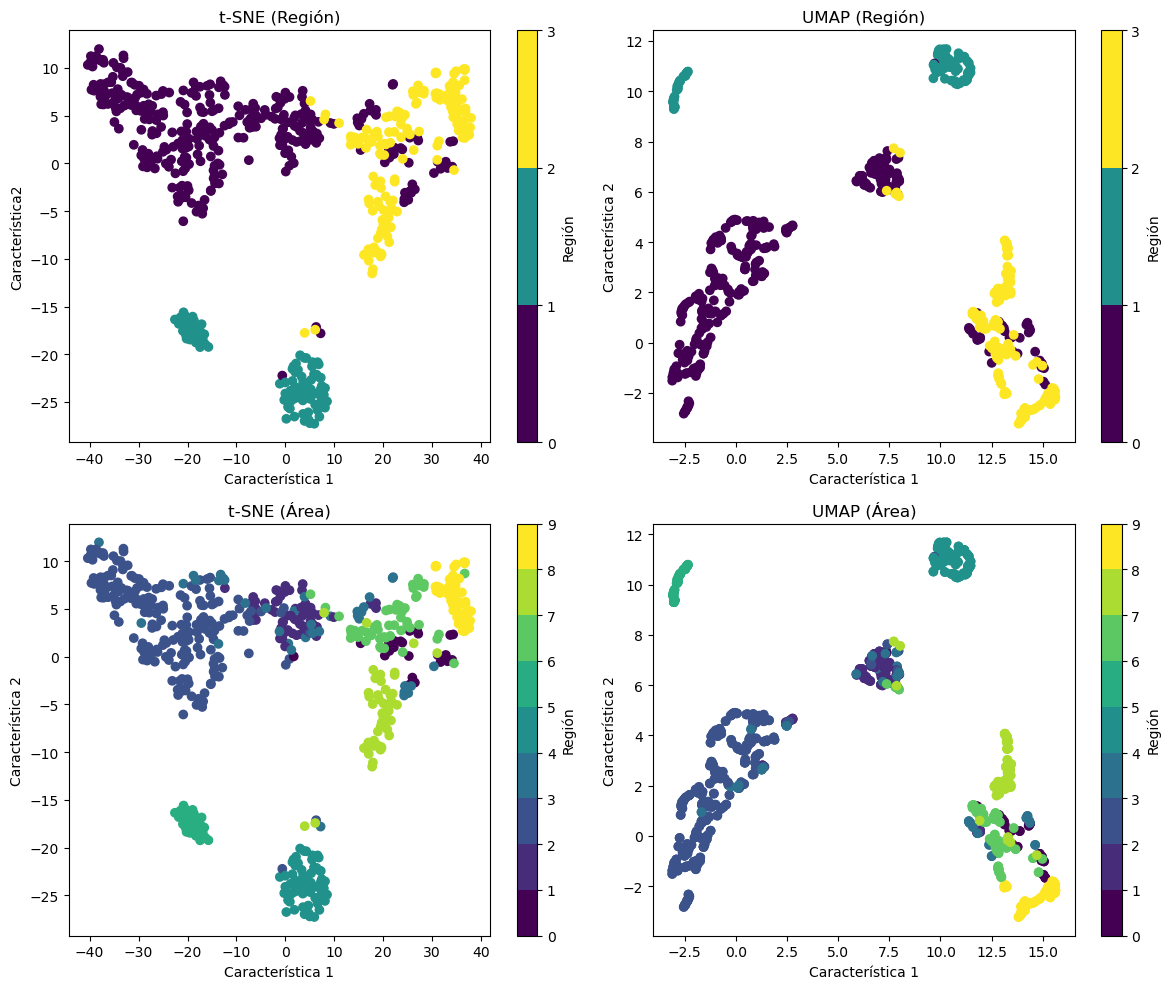

In [33]:
# Crear una figura con 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

cmap = plt.get_cmap('viridis')

bounds_reg = [0, 1, 2, 3]
bounds_are = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

norm_reg = mcolors.BoundaryNorm(bounds_reg, cmap.N)
norm_are = mcolors.BoundaryNorm(bounds_are, cmap.N)

# Scatter plot de t-SNE con y3
axs[0, 0].scatter(tsne_2d_df['Característica 1'], tsne_2d_df['Característica 2'], c=y3, cmap='viridis')
axs[0, 0].set_title('t-SNE (Región)')
axs[0, 0].set_xlabel('Característica 1')
axs[0, 0].set_ylabel('Característica2')
scat_t_reg = axs[0, 0].scatter([], [], c=[], cmap='viridis', norm=norm_reg)
fig.colorbar(scat_t_reg, ax=axs[0, 0], label='Región', ticks=bounds_reg)

# Scatter plot de UMAP con y3
axs[0, 1].scatter(umap_2d_df['Característica 1'], umap_2d_df['Característica 2'], c=y3, cmap='viridis')
axs[0, 1].set_title('UMAP (Región)')
axs[0, 1].set_xlabel('Característica 1')
axs[0, 1].set_ylabel('Característica 2')
scat_t_reg = axs[0, 1].scatter([], [], c=[], cmap='viridis', norm=norm_reg)
fig.colorbar(scat_t_reg, ax=axs[0, 1], label='Región', ticks=bounds_reg)

# Scatter plot de t-SNE con y9
axs[1, 0].scatter(tsne_2d_df['Característica 1'], tsne_2d_df['Característica 2'], c=y9, cmap='viridis')
axs[1, 0].set_title('t-SNE (Área)')
axs[1, 0].set_xlabel('Característica 1')
axs[1, 0].set_ylabel('Característica 2')
scat_t_are = axs[1, 0].scatter([], [], c=[], cmap='viridis', norm=norm_are)
fig.colorbar(scat_t_are, ax=axs[1, 0], label='Región', ticks=bounds_are)

# Scatter plot de UMAP con y9
axs[1, 1].scatter(umap_2d_df['Característica 1'], umap_2d_df['Característica 2'], c=y9, cmap='viridis')
axs[1, 1].scatter(X_umap_2d[:,0], X_umap_2d[:,1], c=y9, cmap='viridis')
axs[1, 1].set_title('UMAP (Área)')
axs[1, 1].set_xlabel('Característica 1')
axs[1, 1].set_ylabel('Característica 2')
scat_t_are = axs[1, 1].scatter([], [], c=[], cmap='viridis', norm=norm_are)
fig.colorbar(scat_t_are, ax=axs[1, 1], label='Región', ticks=bounds_are)

plt.tight_layout()
plt.show()

Paral la etiqueta `Region`, tanto t-SNE como UMAP, son capaces de separar relativamente bien en clusters los distintos tipos de aceite, con solo unas pocas muestras solapadas. Tal vez seamos capaces de separarlas mejor aplicando los mismos algoritmos con `n_components = 3`. El modelo `UMAP` es capaz de agrupar los datos de forma menos dispersa (concentra más las clases en cada cluster).

Para la etiqueta `Area`, las salidas son similares. Los distintos tipos de aceite según el área no están siendo separados correctamente y el solape es bastante alto.

**Representación 3D:**



Esta vez no solo `n_components=3`, si no que además hemos aumentado el valor de perplexity, que controla el número de vecinos que se consideran al construir la estructura de vecindad durante el proceso de optimización. Un valor típico de perplexity suele estar entre 5 y 75. Cuanto mayor sea el valor de perplexity, más vecinos se considerarán en el cálculo de la probabilidad condicional entre los puntos de datos. Un valor alto de perplexity puede conducir a estructuras de incrustación global más significativas, pero también puede aumentar el tiempo de cómputo y la complejidad del algoritmo. Los resultados que obtuvimos en el remapeado 2D con `perplexity=30` eran mejorables cuando se coloreaba según el Área. Hemos duplicado el valor, con el correspondiente coste computacional y no hemos obtenido mejoras aparentes. Por otro lado hemos considerado el doble de vecinos (`n_neighbors=20`) para UMAP (por el mismo motivo) y la representación según el área tampoco mejora. Es posible que no haya más relación subyaciente en el área más que la región a la que pertenecen, que si es fácilmente distinguible.

A continuación, los resultados:

In [34]:
#TSNE
tsne_3d  = TSNE(n_components=3,     # 3D embedding
                random_state=42, 
                perplexity=60,    
                metric="euclidean",
                verbose=True       # no output
                )      

X_tsne_3d = tsne_3d.fit_transform(X)

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 572 samples in 0.000s...
[t-SNE] Computed neighbors for 572 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 572 / 572
[t-SNE] Mean sigma: 108.023545
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.510635
[t-SNE] KL divergence after 1000 iterations: 0.160491


In [35]:
#UMAP
umap_3d = umap.UMAP(n_components=3,  # 3D embedding
                    random_state=42,
                    n_neighbors=20,
                    verbose=True   # no output
                    )

X_umap_3d = umap_3d.fit_transform(X)

UMAP(n_components=3, n_neighbors=20, random_state=42, verbose=True)
Fri Mar  8 21:30:41 2024 Construct fuzzy simplicial set
Fri Mar  8 21:30:41 2024 Finding Nearest Neighbors
Fri Mar  8 21:30:41 2024 Finished Nearest Neighbor Search
Fri Mar  8 21:30:41 2024 Construct embedding


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Fri Mar  8 21:30:42 2024 Finished embedding


In [36]:
tsne_3d_df = pd.DataFrame(X_tsne_3d, columns=['Característica 1', 'Característica 2', 'Característica 3'])
umap_3d_df = pd.DataFrame(X_umap_3d, columns=['Característica 1', 'Característica 2', 'Característica 3'])

In [37]:
tsne_3d_df['Región'] = y3_categories
tsne_3d_df['Área']   = y9_categories
tsne_3d_df['size']   = 10  # tamaño de los puntos

# Crear un gráfico interactivo con Plotly para t-SNE con y3 y y9
fig_tsne_3d = px.scatter_3d(tsne_3d_df, 
                      x='Característica 1', 
                      y='Característica 2', 
                      z='Característica 3',
                      color= 'Región', 
                      symbol= 'Área',
                      size='size',  # Usar la nueva columna 'size' para determinar el tamaño de los puntos
                      title='Visualización T-SNE en 3D',
                      color_discrete_sequence=px.colors.qualitative.Plotly)

fig_tsne_3d.update_layout(
    autosize=True, 
    width=850, 
    height=850,
    legend=dict(
        yanchor="top", y=1,
        xanchor="left", x=1.2
    )
)

# Mostrar el gráfico interactivo
fig_tsne_3d.show()

In [38]:
umap_3d_df['Región'] = y3_categories
umap_3d_df['Área']   = y9_categories
umap_3d_df['size']   = 10  # tamaño de los puntos

# Crear un gráfico interactivo con Plotly para t-SNE con y3 y y9
fig_umap_3d = px.scatter_3d(umap_3d_df, 
                      x='Característica 1', 
                      y='Característica 2', 
                      z='Característica 3',
                      color= 'Región', 
                      symbol= 'Área',
                      size='size',  # Usar la nueva columna 'size' para determinar el tamaño de los puntos
                      title='Visualización UMAP en 3D',
                      color_discrete_sequence=px.colors.qualitative.Plotly)

fig_umap_3d.update_layout(
    autosize=True, 
    width=850, 
    height=750,
    legend=dict(
        yanchor="top", y=1,
        xanchor="left", x=1.2
    )
)

# Mostrar el gráfico interactivo
fig_umap_3d.show()

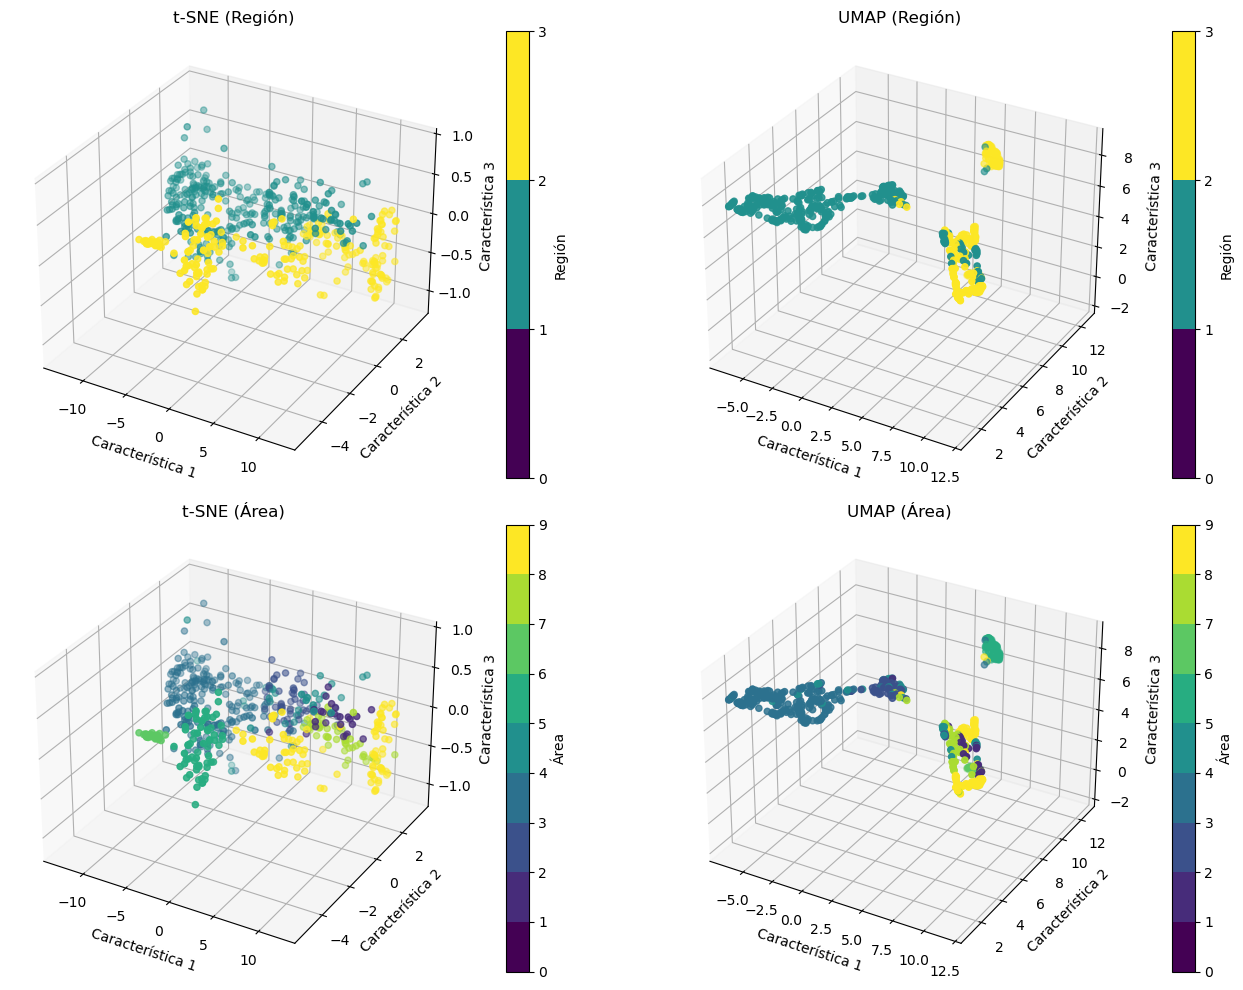

In [39]:
from mpl_toolkits.mplot3d import Axes3D

# Crear una figura con 4 subplots
fig = plt.figure(figsize=(14, 10))

cmap = plt.get_cmap('viridis')

bounds_reg = [0, 1, 2, 3]
bounds_are = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

norm_reg = mcolors.BoundaryNorm(bounds_reg, cmap.N)
norm_are = mcolors.BoundaryNorm(bounds_are, cmap.N)

# Scatter plot 3D de t-SNE con y3
ax = fig.add_subplot(2, 2, 1, projection='3d')
scat_t_reg = ax.scatter(tsne_3d_df['Característica 1'], tsne_3d_df['Característica 2'], tsne_3d_df['Característica 3'], c=y3, cmap='viridis', norm=norm_reg)
ax.set_title('t-SNE (Región)')
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')
fig.colorbar(scat_t_reg, ax=ax, label='Región', ticks=bounds_reg, pad=0.07)

# Scatter plot 3D de UMAP con y3 
ax = fig.add_subplot(2, 2, 2, projection='3d')
scat_u_reg = ax.scatter(umap_3d_df['Característica 1'], umap_3d_df['Característica 2'], umap_3d_df['Característica 3'], c=y3, cmap='viridis', norm=norm_reg)
ax.set_title('UMAP (Región)')
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')
fig.colorbar(scat_u_reg, ax=ax, label='Región', ticks=bounds_reg, pad=0.07)

# Scatter plot 3D de t-SNE con y9
ax = fig.add_subplot(2, 2, 3, projection='3d')
scat_t_are = ax.scatter(tsne_3d_df['Característica 1'], tsne_3d_df['Característica 2'], tsne_3d_df['Característica 3'], c=y9, cmap='viridis', norm=norm_are)
ax.set_title('t-SNE (Área)')
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')
fig.colorbar(scat_t_are, ax=ax, label='Área', ticks=bounds_are, pad=0.07)

# Scatter plot 3D de UMAP con y9
ax = fig.add_subplot(2, 2, 4, projection='3d')
scat_u_are = ax.scatter(umap_3d_df['Característica 1'], umap_3d_df['Característica 2'], umap_3d_df['Característica 3'], c=y9, cmap='viridis', norm=norm_are)
ax.set_title('UMAP (Área)')
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')
fig.colorbar(scat_u_are, ax=ax, label='Área', ticks=bounds_are, pad=0.07)

plt.tight_layout()
plt.show()

### 2.2 Variación en los valores de `perplexity` y `n_neighbours`



#### **Perplexity**

En primer lugar, sobre el modelo `t-SNE` se varía el valor de `perplexity` de 5 a 105 variando de 5 en 5, con el fin de ver como afecta este parámetro a los resultados. Probamos con `n_components=2` y `n_components_3`. Aunque normalmente nos centraríamos en los valores de perplexity $\in (5,50)$, iremos un poco más hallá para ver si hay algún comportamiento asintótico.

In [40]:
from openTSNE import TSNE as openTSNE

In [77]:
lista_perplexity_2d = range(5, 106, 5)

for p in lista_perplexity_2d:
    tsne_barrido = openTSNE(perplexity=p, 
                        n_components=2, 
                        metric="euclidean",
                        random_state=42,
                        verbose=True       
                        ) 

    %time TSNE_2d_barrido = tsne_barrido.fit(X)
    

--------------------------------------------------------------------------------
TSNE(perplexity=5, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 15 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 3.7777, 50 iterations in 0.0560 sec
Iteration  100, KL divergence 3.0125, 50 iterations in 0.0440 sec
Iteration  150, KL divergence 2.7981, 50 iterations in 0.0460 sec
Iteration  200, KL divergence 2.6986, 50 iterations in 0.0430 sec
Iteration  250, KL divergence 2.6386, 50 iterations in 0.0460 sec
   --> Time elapsed: 0.23 seconds
===> Running optimization with exaggeration=1.00, lr=200.00 for 500 iteration

In [83]:

kl_div_2d = {
    'Perplexity': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105],
    'KL_Divergence': [0.5041, 0.4508, 0.4040, 0.3656, 0.3359, 0.3124, 0.2934, 0.2789, 0.2605, 0.2482, 
    0.2386, 0.2298, 0.2220, 0.2146, 0.2146, 0.2091, 0.2090, 0.2091, 0.2117, 0.1711, 0.1653],
    'Time': [0.51, 0.52, 0.54, 0.54, 0.56, 0.57, 0.59, 0.61, 0.63, 0.65, 0.68, 0.70, 0.72, 0.75, 0.75, 0.79, 0.83, 0.85, 0.87, 0.90, 0.93]
}

# Crear el DataFrame
df_2dkl = pd.DataFrame(kl_div_2d)

# Mostrar el DataFrame
print(df_2dkl)

    Perplexity  KL_Divergence  Time
0            5         0.5041  0.51
1           10         0.4508  0.52
2           15         0.4040  0.54
3           20         0.3656  0.54
4           25         0.3359  0.56
5           30         0.3124  0.57
6           35         0.2934  0.59
7           40         0.2789  0.61
8           45         0.2605  0.63
9           50         0.2482  0.65
10          55         0.2386  0.68
11          60         0.2298  0.70
12          65         0.2220  0.72
13          70         0.2146  0.75
14          75         0.2146  0.75
15          80         0.2091  0.79
16          85         0.2090  0.83
17          90         0.2091  0.85
18          95         0.2117  0.87
19         100         0.1711  0.90
20         105         0.1653  0.93


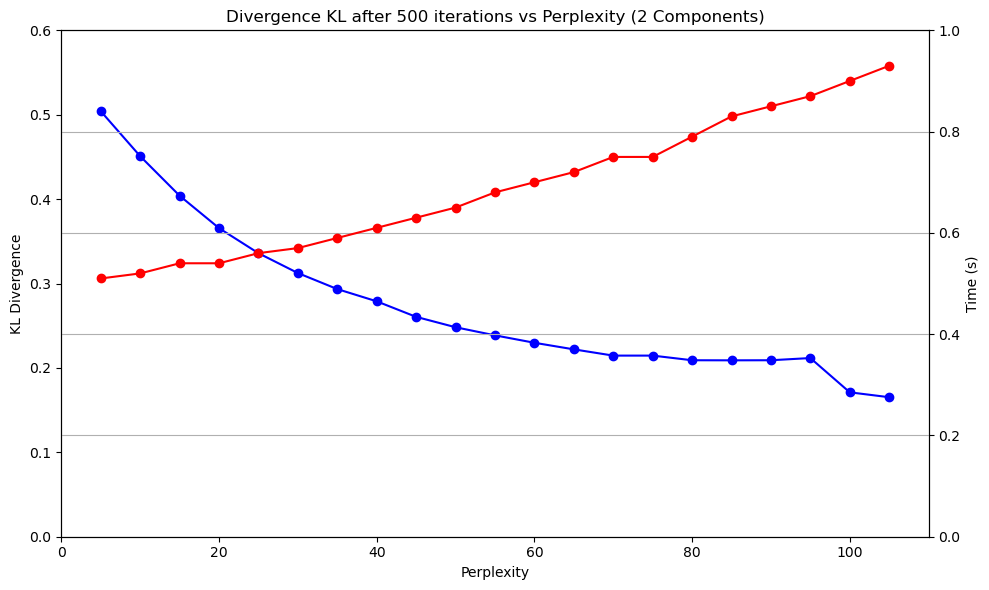

In [87]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot KL Divergence
ax1.plot(df_2dkl["Perplexity"], df_2dkl["KL_Divergence"], marker='o', color='blue', linestyle='-')
ax1.set_xlabel('Perplexity')
ax1.set_ylabel('KL Divergence')
ax1.set_ylim(0, 0.6)

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(df_2dkl["Perplexity"], df_2dkl["Time"], marker='o', color='red', linestyle='-')
ax2.set_ylabel('Time (s)')
ax2.set_ylim(0, 1.0)

# Add labels and title
plt.title('Divergence KL after 500 iterations vs Perplexity (2 Components)')
plt.grid(True)
plt.tight_layout()
plt.show()



In [80]:
lista_perplexity_3d = range(5, 106, 5)

for p in lista_perplexity_3d:
    tsne_barrido = openTSNE(perplexity=p, 
                        n_components=3, 
                        metric="euclidean",
                        random_state=42,
                        verbose=True       
                        ) 

    %time TSNE_3d_barrido = tsne_barrido.fit(X)

--------------------------------------------------------------------------------
TSNE(n_components=3, perplexity=5, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 15 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 3.7385, 50 iterations in 0.0860 sec
Iteration  100, KL divergence 2.9487, 50 iterations in 0.0713 sec
Iteration  150, KL divergence 2.7537, 50 iterations in 0.0686 sec
Iteration  200, KL divergence 2.6642, 50 iterations in 0.0700 sec
Iteration  250, KL divergence 2.6124, 50 iterations in 0.0690 sec
   --> Time elapsed: 0.36 seconds
===> Running optimization with exaggeration=1.00, lr=200.00 f

In [93]:
kl_div_3d = {
    'Perplexity': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105],
    'KL_divergence': [2.6124, 0.4921, 0.3991, 0.3537, 0.3228, 0.2989, 0.2790, 0.2633, 0.2488, 0.2379, 
    0.2289, 0.2207, 0.2140, 0.2094, 0.1997, 0.1929, 0.1859, 0.1793, 0.1728, 0.1668, 0.1616],
    'Time': [0.74, 0.74, 0.77, 0.79, 0.81, 0.88, 0.82, 0.91, 0.94, 0.94, 0.99, 1.02, 1.06, 1.02, 
    1.05, 1.21, 1.17, 1.20, 1.29, 1.30, 1.25]
}



# Crear el DataFrame
df_3dkl = pd.DataFrame(kl_div_3d)

# Mostrar el DataFrame
print(df_3dkl)

    Perplexity  KL_divergence  Time
0            5         2.6124  0.74
1           10         0.4921  0.74
2           15         0.3991  0.77
3           20         0.3537  0.79
4           25         0.3228  0.81
5           30         0.2989  0.88
6           35         0.2790  0.82
7           40         0.2633  0.91
8           45         0.2488  0.94
9           50         0.2379  0.94
10          55         0.2289  0.99
11          60         0.2207  1.02
12          65         0.2140  1.06
13          70         0.2094  1.02
14          75         0.1997  1.05
15          80         0.1929  1.21
16          85         0.1859  1.17
17          90         0.1793  1.20
18          95         0.1728  1.29
19         100         0.1668  1.30
20         105         0.1616  1.25


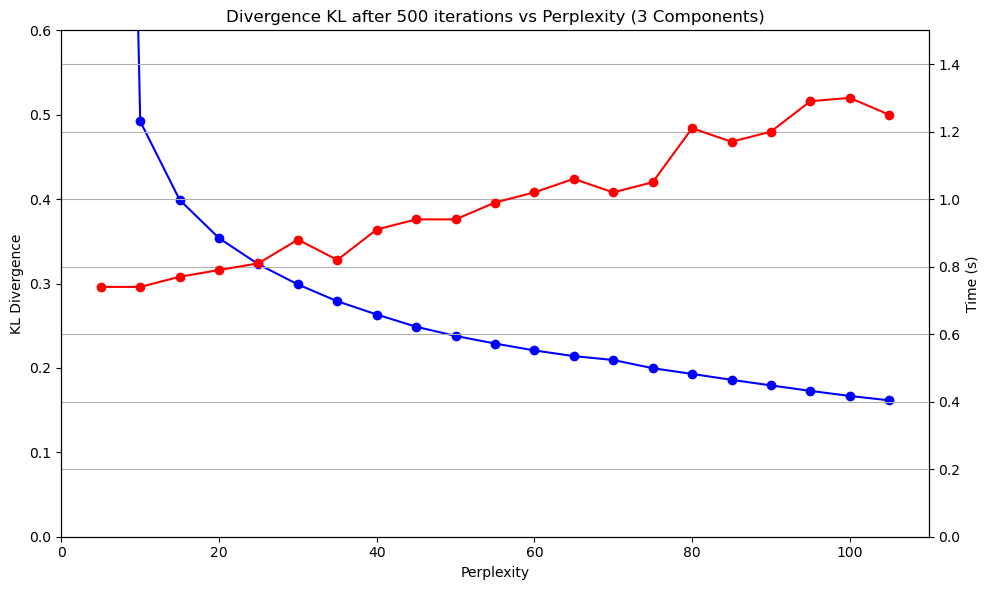

In [99]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot KL Divergence
ax1.plot(df_3dkl["Perplexity"], df_3dkl["KL_divergence"], marker='o', color='blue', linestyle='-')
ax1.set_xlabel('Perplexity')
ax1.set_ylabel('KL Divergence')
ax1.set_ylim(0, 0.6)

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(df_3dkl["Perplexity"], df_3dkl["Time"], marker='o', color='red', linestyle='-')
ax2.set_ylabel('Time (s)')
ax2.set_ylim(0, 1.5)

# Add labels and title
plt.title('Divergence KL after 500 iterations vs Perplexity (3 Components)')
plt.grid(True)
plt.tight_layout()
plt.show()



Si lo representamos de forma conjunta:

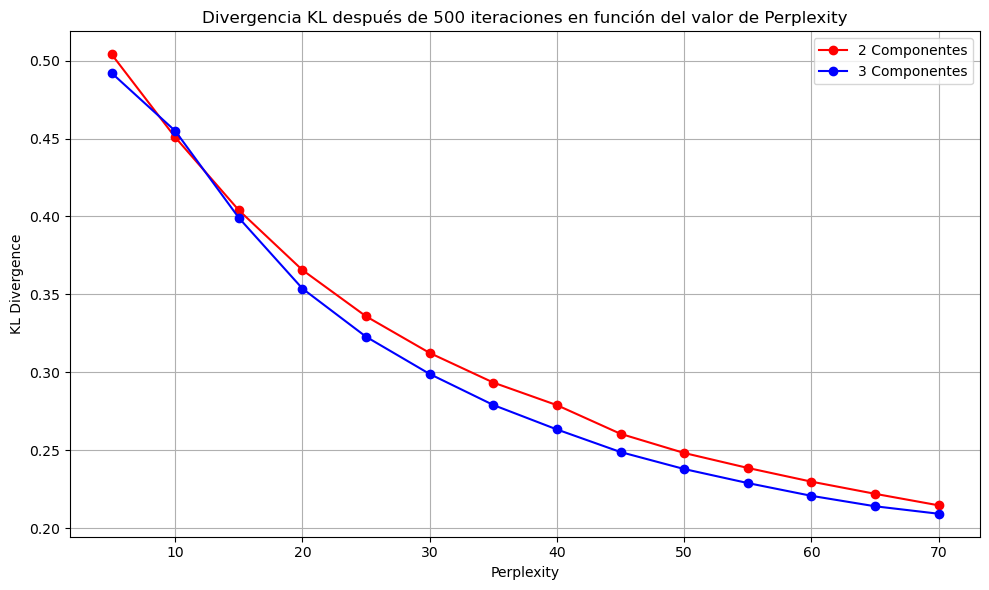

In [76]:
plt.figure(figsize=(10, 6))
# Plot de 2 Componentes
plt.plot(df_2dkl["Perplexity"], df_2dkl["KL_Divergence"], marker='o', color='red', linestyle='-', label='2 Componentes')

# Plot de 3 Componentes
plt.plot(df_3dkl["Perplexity"], df_3dkl["KL_Divergence"], marker='o', color='blue', linestyle='-', label='3 Componentes')

# Añadir etiquetas y título
plt.title('Divergencia KL después de 500 iteraciones en función del valor de Perplexity')
plt.xlabel('Perplexity')
plt.ylabel('KL Divergence')
plt.grid(True)
plt.legend()  # Mostrar leyenda con etiquetas de los componentes

# Mostrar la gráfica combinada
plt.tight_layout()
plt.show()

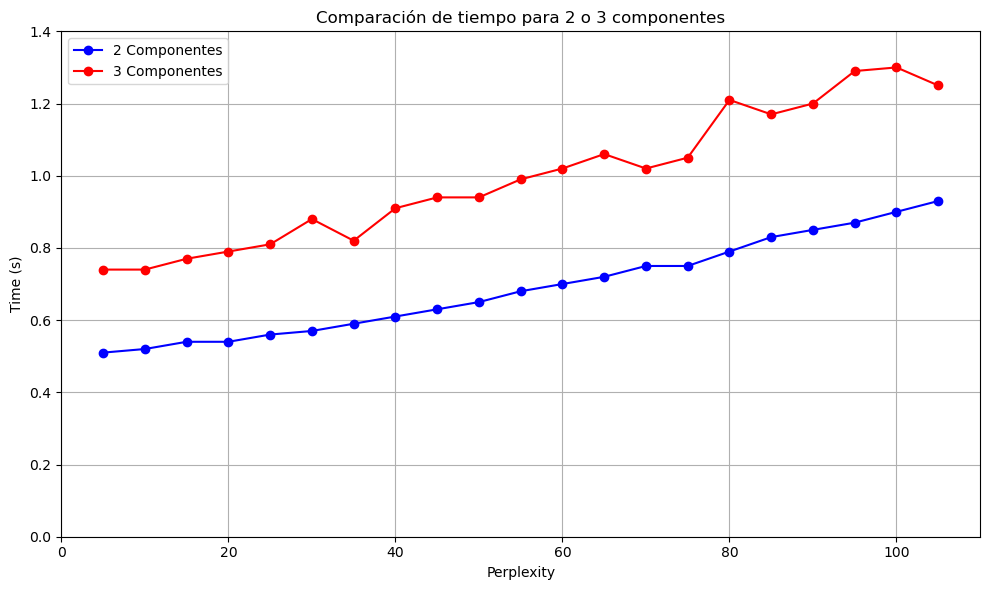

In [104]:

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot for 2 components
ax.plot(df_2dkl["Perplexity"], df_2dkl["Time"], marker='o', color='blue', linestyle='-', label='2 Componentes')

# Plot for 3 components
ax.plot(df_3dkl["Perplexity"], df_3dkl["Time"], marker='o', color='red', linestyle='-', label='3 Componentes')

# Set labels and title
ax.set_xlabel('Perplexity')
ax.set_ylabel('Time (s)')
ax.set_ylim(0, 1.4)  # Adjust the y-axis limit if needed
ax.legend()

# Add title and grid
plt.title('Comparación de tiempo para 2 o 3 componentes')
plt.grid(True)
plt.tight_layout()
plt.show()

En la implementación de t-SNE con 3 dimensiones, se observa un comportamiento similar al de 2 dimensiones: a medida que aumenta el valor de la `perplexity`, disminuye el valor de la `Kullback-Leibler` (KL). La `perplexity` es un parámetro que determina el número de vecinos a considerar en los cálculos, y está vinculado con la amplitud de la distribución gaussiana utilizada; por lo tanto, a valores más altos de `perplexity`, se consideran más vecinos.

Normalmente, la `perplexity` se sitúa alrededor de 30, aunque puede variar dependiendo del caso, sin superar nunca el número total de puntos en el dataset. Como tenemos 573 muestras (con 8 características), esta última restricción no es roblema. REcordemos que la divergencia KL mide la similitud entre dos distribuciones de probabilidad: la de los datos originales y la de los datos en el espacio transformado. Por lo tanto, se busca minimizar la KL para maximizar la afinidad entre las distribuciones.

La librería exige no paralelizar TSNE para que los datos sean reproducibles indicando el `random state`. Ello nos limita a un núcleo. Los tiempos de cálculo oscilan entre `0.5 s` para `perplexity=5` con 2 componentes y `1.25 s` para `perplexity=105` con 3 componentes (aproximadamente).

#### **Neighbours**

A continuación, variamos `n_neighbors` desde 2 hasta 20 (no incluido), yendo de 2 en 2, con el fin de comprobar que efecto tiene el número de vecinos en los resultados que proporciona el modelo `UMAP.` La forma más sencilla de evaluar el método es visualizar los datos, aunque podríamos hacer uso del test de información mutua (ver notebook de UMAP). Por tanto, para cada número de vecinos probado se realizará un gráfico con el fin de ver los clusters o agrupaciones de los datos.

c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



CPU times: total: 1.28 s
Wall time: 1.42 s
CPU times: total: 531 ms
Wall time: 1.72 s
CPU times: total: 891 ms
Wall time: 1.42 s
CPU times: total: 875 ms
Wall time: 1.46 s
CPU times: total: 641 ms
Wall time: 1.49 s
CPU times: total: 734 ms
Wall time: 1.5 s
CPU times: total: 750 ms
Wall time: 1.51 s
CPU times: total: 672 ms
Wall time: 1.9 s
CPU times: total: 1.09 s
Wall time: 1.57 s


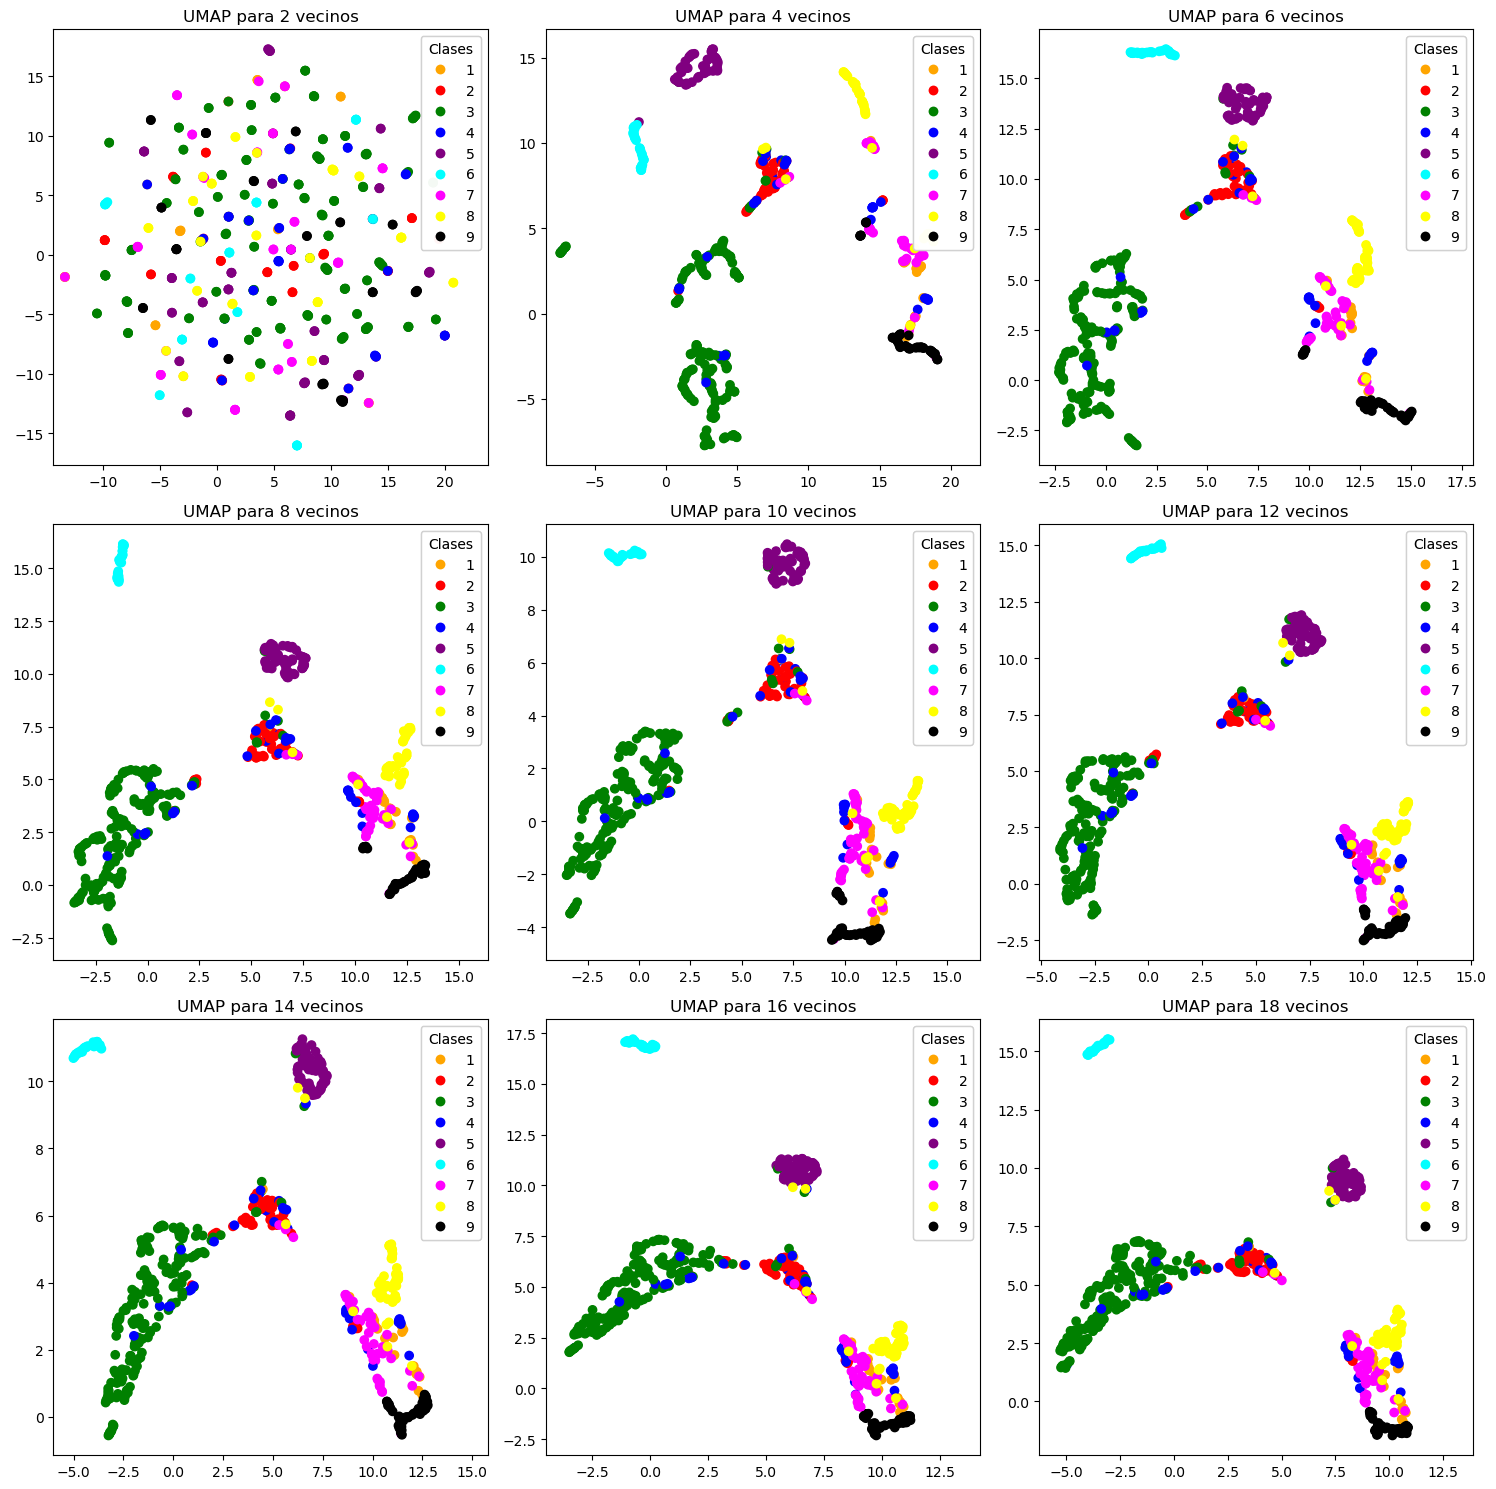

In [110]:
## Barrido de vecinos para UMAP: 2 Componentes


# Definir un colormap discreto con 9 colores
cmap = ListedColormap(["orange", "red", "green", "blue", "purple", "cyan", "magenta", "yellow", "black"])

vecinos = range(2, 20, 2)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, v in enumerate(vecinos):
    row = i // 3
    col = i % 3
    
    %time embeddingUMAP2d = umap.UMAP(n_neighbors=v, n_components=2).fit_transform(X)
    
    # Scatter plot usando Matplotlib
    scatter = axes[row, col].scatter(embeddingUMAP2d[:, 0], embeddingUMAP2d[:, 1], c=list(y9), cmap=cmap)
    axes[row, col].set_title('UMAP para {} vecinos'.format(v))
    
    # Agregar la leyenda de colores
    legend1 = axes[row, col].legend(*scatter.legend_elements(), title="Clases", loc="upper right")
    axes[row, col].add_artist(legend1)

    
    # Aumentar los límites del eje horizontal
    axes[row, col].set_xlim(embeddingUMAP2d[:, 0].min() - 1, embeddingUMAP2d[:, 0].max() + 3)



plt.tight_layout()
plt.show()

Se puede observar que cuando se consideran solo 2 vecinos, el agrupamiento es incoherente. Los datos no forman clusters distintivos, sino que están dispuestos en el gráfico a una distancia similar unos de otros. Sin embargo, el resultado parece ser óptimo y similar para 6, 8 y 10 vecinos, donde los datos se organizan en grupos homogéneos, formando 3 o 4 clusters principales formados por clusters más pequeños. A partir de 14 vecinos, los grupos comienzan a fusionarse y se pierde calidad en el clustering.

A continuación probaremos a usar 3 componentes para UMAP:

c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



CPU times: total: 1.56 s
Wall time: 1.46 s
CPU times: total: 1.38 s
Wall time: 1.4 s
CPU times: total: 1.61 s
Wall time: 1.44 s
CPU times: total: 594 ms
Wall time: 1.83 s
CPU times: total: 547 ms
Wall time: 1.47 s
CPU times: total: 922 ms
Wall time: 1.54 s
CPU times: total: 875 ms
Wall time: 1.52 s
CPU times: total: 609 ms
Wall time: 1.52 s
CPU times: total: 766 ms
Wall time: 1.55 s


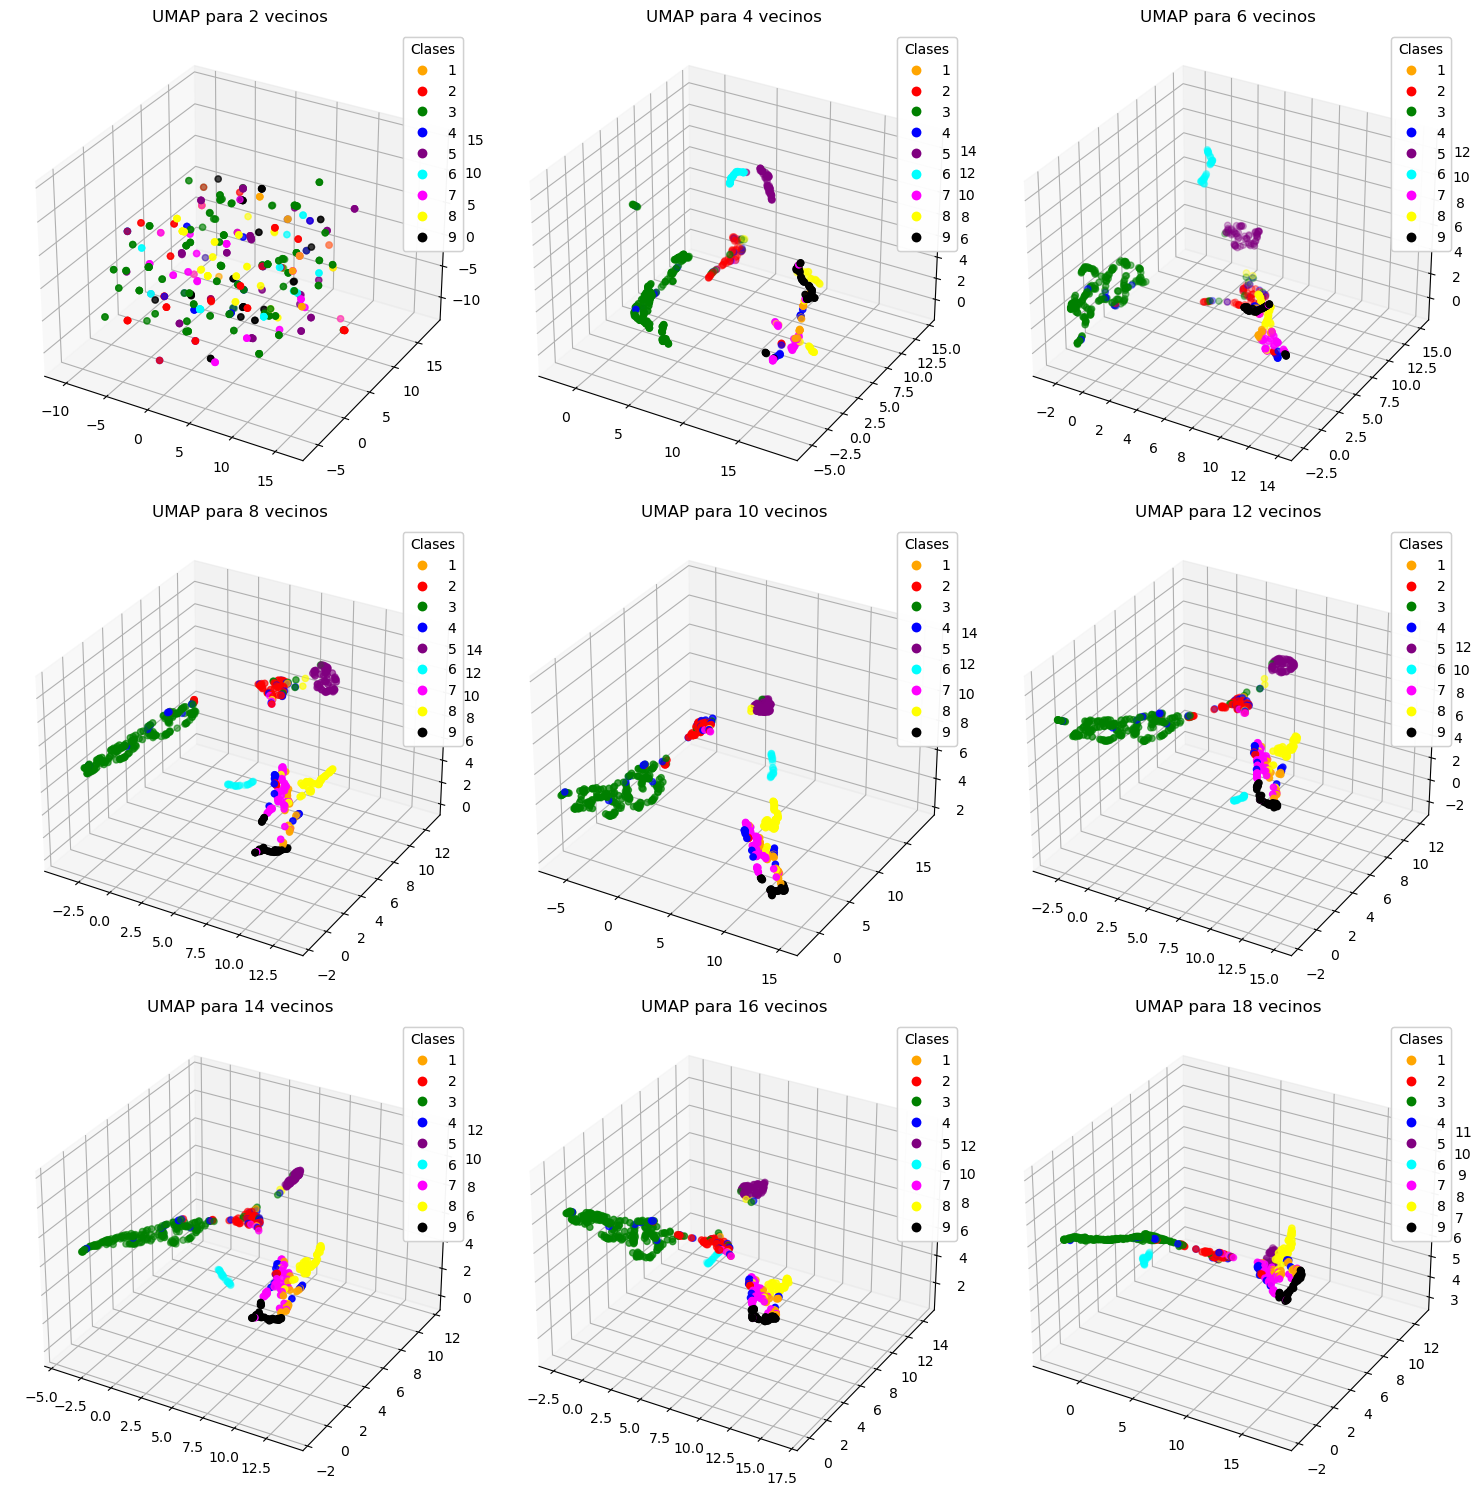

In [112]:
# Definir un colormap discreto con 9 colores
cmap = ListedColormap(["orange", "red", "green", "blue", "purple", "cyan", "magenta", "yellow", "black"])

vecinos = range(2, 20, 2)
fig, axes = plt.subplots(3, 3, figsize=(15, 15), subplot_kw={'projection': '3d'})

for i, v in enumerate(vecinos):
    row = i // 3
    col = i % 3
    
    %time embeddingUMAP3d = umap.UMAP(n_neighbors=v, n_components=3).fit_transform(X)
    
    # Scatter plot en 3D usando Matplotlib
    scatter = axes[row, col].scatter(embeddingUMAP3d[:, 0], embeddingUMAP3d[:, 1], embeddingUMAP3d[:, 2], c=list(y9), cmap=cmap)
    axes[row, col].set_title('UMAP para {} vecinos'.format(v))
    
    # Agregar la leyenda de colores
    legend1 = axes[row, col].legend(*scatter.legend_elements(), title="Clases", loc="upper right")
    axes[row, col].add_artist(legend1)

    # Aumentar los límites de los ejes
    axes[row, col].set_xlim(embeddingUMAP3d[:, 0].min() - 1, embeddingUMAP3d[:, 0].max() + 3)
    axes[row, col].set_ylim(embeddingUMAP3d[:, 1].min() - 1, embeddingUMAP3d[:, 1].max() + 3)
    axes[row, col].set_zlim(embeddingUMAP3d[:, 2].min() - 1, embeddingUMAP3d[:, 2].max() + 3)

plt.tight_layout()
plt.show()


Después de analizar los resultados obtenidos con UMAP en 3D, se observa una tendencia similar a la obtenida en la proyección bidimensional de UMAP2D. El agrupamiento para 2 vecinos resulta poco efectivo, no hay agrupamiento alguno. Por otro lado, parece que se alcanza un mejor agrupamiento al considerar 4 o más vecinos. Sin embargo, a partir de 16 vecinos, los grupos comienzan a fusionarse en exceso.

Después de evaluar los resultados, se concluye que el número óptimo de vecinos para lograr la mejor representación del conjunto de datos es de 8. Aunque los valores 6 y 10 también podrían ser considerados. 

### 3.- Reducción de la dimensionalidad.

Realiza un estudio para averiguar la dimensionalidad intrínseca del dataset.

### 4.- Reducción de la dimensionalidad y clasificación de los aceites en Regions y Areas.

- Separa el conjunto de datos en train (70%) y test (30%).
- Reduce la dimensionalidad del dataset utilizando los métodos espectrales vistos en clase. Investiga qué valor de número de vecinos es el más adecuado para el número de componentes que consideres adecuado en función del estudio de la dimensionalidad intrínseca.
- Elige el algoritmo de clasificación que consideres oportuno para resolver un problema de este tipo y aplícalo a estos datos.
- ¿Qué algoritmo de reducción de la dimensionalidad obtiene el mejor score para clasificar los datos en regiones? ¿Y en áreas? ¿Es el procedimiento más rápido en términos de tiempo de ejecución? Realiza una tabla con el rendimiento de la clasificación de cada algoritmo de reducción de dimensionaidad y el tiempo de ejecución.

In [ ]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

#### 4.1 Clasificación 3 grupos

#### 4.2 Clasificación 9 grupos